# General usage of the package:

In [1]:
from dhybridrpy import DHybridrpy

`dhybridrpy` efficiently loads your input and output data from dHybridR and gives you easy access to them. Just create a `DHybridrpy` object and specify your dHybridR input file and output folder.

In [2]:
input_file = "data/inputs/input1"
output_folder = "data/Output1"
dpy = DHybridrpy(input_file=input_file, output_folder=output_folder)

Let's print some information, like the timesteps over which the simulation ran and the variables + values in our input file.

In [3]:
dpy.timesteps()

array([  1,  32,  64,  96, 128])

The inputs are organized into a nested (2-level) dictionary called `dpy.inputs`. Let's print a specific value, and then print all values in the dictionary.

In [4]:
input_dict = dpy.inputs
print(f"Timestep = {input_dict['time']['dt']}")

Timestep = 0.0025


In [5]:
for key1, value1 in input_dict.items():
    for key2, value2 in value1.items():
        print(f"{key2} = {value2}")

node_number = [1, 1]
dt = 0.0025
niter = 128
t0 = 0.0
stiter = 0
c = 200.0
ncells = [128, 128]
boxsize = [64.0, 64.0]
bdtype = ['reflect', 'open', 'per', 'per']
te = 1.0
gamma = 1.67
dodump = True
ndump = 32
b0 = 3.05191e-07
n0 = 1000000.0
units = NORM
do_restart = False
save_restart = False
restart_step = 2500
bx = 0.
by = 0.05
bz = 0.
ex = .1
ey = 0.
ez = 0.
n_constants = 0
dmp_efld = [True, True, True, True]
dmp_bfld = [True, True, True, True]
dmp_jfld = [True, True]
ifsmooth = False
ifsmoothextfields = False
filternpass = 8
compensate = False
subniter = 8
allowederror = 1.0
loadbalance = False
ifdynamicloadbalance = False
dynamicloadbalancestep = 25
num_species = 1
part_sort_step = 1
name = H+
dist = THERMAL
num_par = [8, 8]
spare_size = 0.1
ir = 1
rqm = 1.0
vdrift = [-30.0, 0.0, 0.0]
vth = 1.0
kin_push = True
ion_t = 8.0
nsp = 1.
n_constants = 0
follow = True
bdtype = ['reflect', 'open', 'per', 'per']
vth = 0.0
sttime = 0.0
plane = yz
planepos = 64.0
boundary = [0.0, 64.0]
num_par

Suppose we want to print some data, like a field at one of our timesteps. We first see what information was extracted from our output folder at a timestep.

In [6]:
# See the field / phase / raw files found at any timestep
ts = 1
dpy.timestep(ts)

Fields at timestep 1 = {'origin = Total': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez', 'Jmagnitude', 'Jx', 'Jy', 'Jz'], 'origin = External': [], 'origin = Self': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez']}
Phases at timestep 1 = {'species = 1': ['etx1', 'p1x1', 'p2x1', 'p3x1', 'x3x2x1']}
Raw files at timestep 1 = {}

As you can see, fields are specified into 3 types by their origin: "External", "Self", and "Total". If you don't specify, origin = "Total" by default. Similarly, phases and raw files are organized by the "species" parameter. By default, species = 1.

In [7]:
Bx = dpy.timestep(ts).fields.Bx(origin="Total").data
print(f"Bx at every grid point = {Bx}")

Bx at every grid point = [[-1.2844946e-06 -5.9784924e-07  2.7186761e-08 ... -8.2834566e-07
  -1.9422710e-06 -1.9215558e-06]
 [-2.7124233e-06 -1.3861040e-06 -1.7116083e-07 ... -1.5988732e-06
  -3.7117115e-06 -3.8374069e-06]
 [-3.2097814e-06 -1.7878265e-06 -4.3251919e-07 ... -1.4876221e-06
  -3.5462726e-06 -4.1019912e-06]
 ...
 [ 1.3562029e-06  1.6056165e-06  1.3316774e-06 ... -1.5186570e-06
  -5.3363038e-07  5.5762820e-07]
 [ 1.9283166e-06  2.1628789e-06  1.7268114e-06 ... -1.5641297e-06
  -3.0272159e-07  1.0131404e-06]
 [ 2.1502308e-06  2.4196106e-06  1.8798246e-06 ... -1.5185980e-06
  -2.0266164e-07  1.1595343e-06]]


You can also print Bx's grids and limits for each axis.

In [8]:
print(f"x-grid = {dpy.timestep(ts).fields.Bx().xdata}")
print(f"y-grid = {dpy.timestep(ts).fields.Bx().ydata}")
print(f"x-grid limits = {dpy.timestep(ts).fields.Bx().xlimdata}")
print(f"y-grid limits = {dpy.timestep(ts).fields.Bx().ylimdata}")

x-grid = [ 0.25  0.75  1.25  1.75  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75
  6.25  6.75  7.25  7.75  8.25  8.75  9.25  9.75 10.25 10.75 11.25 11.75
 12.25 12.75 13.25 13.75 14.25 14.75 15.25 15.75 16.25 16.75 17.25 17.75
 18.25 18.75 19.25 19.75 20.25 20.75 21.25 21.75 22.25 22.75 23.25 23.75
 24.25 24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75
 30.25 30.75 31.25 31.75 32.25 32.75 33.25 33.75 34.25 34.75 35.25 35.75
 36.25 36.75 37.25 37.75 38.25 38.75 39.25 39.75 40.25 40.75 41.25 41.75
 42.25 42.75 43.25 43.75 44.25 44.75 45.25 45.75 46.25 46.75 47.25 47.75
 48.25 48.75 49.25 49.75 50.25 50.75 51.25 51.75 52.25 52.75 53.25 53.75
 54.25 54.75 55.25 55.75 56.25 56.75 57.25 57.75 58.25 58.75 59.25 59.75
 60.25 60.75 61.25 61.75 62.25 62.75 63.25 63.75]
y-grid = [ 0.25  0.75  1.25  1.75  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75
  6.25  6.75  7.25  7.75  8.25  8.75  9.25  9.75 10.25 10.75 11.25 11.75
 12.25 12.75 13.25 13.75 14.25 14.75 15.25 15.75 16.25 1

We can also quickly plot the data. The `plot` function accepts a variaty of arguments to customize the plot to your liking. Simply call `plt.savefig(...)` afterwards to save the figure.

(<Axes: title={'center': 'Bx at timestep 1'}, xlabel='$x$', ylabel='$y$'>,
 <matplotlib.collections.QuadMesh at 0x7f994a0f9390>)

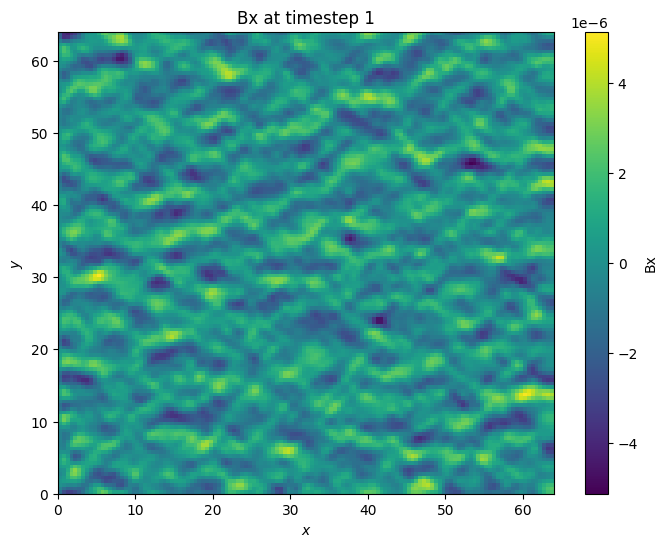

In [9]:
import matplotlib.pyplot as plt
dpy.timestep(ts).fields.Bx().plot()

# Lazy loading of large datasets with `dask`

For extremely large output files (from large 2D or 3D simulations), eagerly loading the data may be impractical due to memory limitations or slow processing speeds. To address this, you can instantiate the `DHybridrpy` object with `lazy = True`. This leverages the `dask` library to load data lazily, performing computations only when `compute()` is explicitly called. This approach allows datasets larger than the available memory to be efficiently loaded thanks to `dask`'s use of computational graphs and parallelized processing.

In [10]:
dpy = DHybridrpy(input_file=input_file, output_folder=output_folder, lazy=True)

In [11]:
p1x1 = dpy.timestep(ts).phases.p1x1().data
print(f"p1x1 = {p1x1}")

p1x1 = dask.array<from-value, shape=(256, 512), dtype=float32, chunksize=(256, 512), chunktype=numpy.ndarray>


In [12]:
print(f"p1x1, evaluted = {p1x1.compute()}")

p1x1, evaluted = [[0.         0.         0.         ... 0.         0.00032918 0.00032918]
 [0.         0.         0.         ... 0.         0.000564   0.000564  ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# Additional features

### Accessing data via timestep indices

You can access data according to timestep indices rather than timesteps themselves using the `timestep_index` function. For example,

In [13]:
print(dpy.timesteps())
print(dpy.timestep_index(0))
print(dpy.timestep_index(-1))

[  1  32  64  96 128]
Fields at timestep 1 = {'origin = Total': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez', 'Jmagnitude', 'Jx', 'Jy', 'Jz'], 'origin = External': [], 'origin = Self': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez']}
Phases at timestep 1 = {'species = 1': ['etx1', 'p1x1', 'p2x1', 'p3x1', 'x3x2x1']}
Raw files at timestep 1 = {}
Fields at timestep 128 = {'origin = Total': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez', 'Jmagnitude', 'Jx', 'Jy', 'Jz'], 'origin = External': [], 'origin = Self': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez']}
Phases at timestep 128 = {'species = 1': ['etx1', 'p1x1', 'p2x1', 'p3x1', 'x3x2x1']}
Raw files at timestep 128 = {}


By default, timestep 0 is excluded if it's present in your output file. To include it, set `exclude_timestep_zero = False` when instantiating your `DHybridrpy` object.

In [14]:
dpy = DHybridrpy(input_file=input_file, output_folder=output_folder, exclude_timestep_zero=False)
print(dpy.timesteps())
print(dpy.timestep_index(0))
print(dpy.timestep_index(-1))

[  0   1  32  64  96 128]
Fields at timestep 0 = {'origin = Total': [], 'origin = External': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez'], 'origin = Self': []}
Phases at timestep 0 = {}
Raw files at timestep 0 = {}
Fields at timestep 128 = {'origin = Total': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez', 'Jmagnitude', 'Jx', 'Jy', 'Jz'], 'origin = External': [], 'origin = Self': ['Bmagnitude', 'Bx', 'By', 'Bz', 'Emagnitude', 'Ex', 'Ey', 'Ez']}
Phases at timestep 128 = {'species = 1': ['etx1', 'p1x1', 'p2x1', 'p3x1', 'x3x2x1']}
Raw files at timestep 128 = {}
